In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=100, centers=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.422552,5.888359
1,-3.950726,6.985160
2,-5.108208,1.940117
3,-3.231864,8.781188
4,9.531058,7.469846


In [3]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

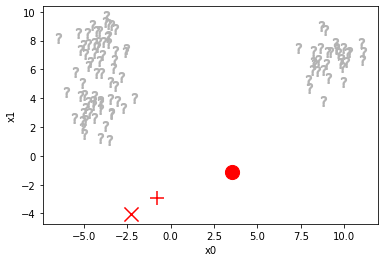

In [4]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = list(self.clusters["label"])
        
    def plot(self):
        ax = km_scatter(self.df, s=100, c="0.7")
        km_scatter(self.clusters, s=200, c="red", ax=ax)
        
    # centroids => points (df)
    def assign_points(self):
        for cluster in self.clusters.itertuples():
            x0_diff = df["x0"] - cluster.x0
            x1_diff = df["x1"] - cluster.x1
            dist = (x0_diff**2 + x1_diff**2) ** 0.5
            self.df[cluster.label] = dist
        self.df["label"] = km.df[km.labels].idxmin(axis=1)
        return self
    
    # centroids => points
    def update_centers(self):
        clusters = km.df.groupby("label").mean()
        self.clusters = clusters[["x0", "x1"]].reset_index()
        return self
        
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]
        
km = KM(df, clusters)
km.plot()

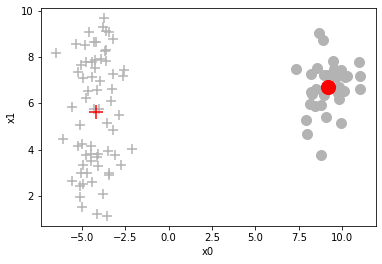

In [5]:
# 1. fit
epochs = 10
for i in range(epochs):
    km.assign_points()
    km.update_centers()
    # TODO: break if not getting any better
km.plot()

In [6]:
km.df.head(3)

,x0,x1,o,+,x,label
0,8.422552,5.888359,1.145677,12.632283,14.598449,o
1,-3.950726,6.985160,13.167794,1.392975,11.140405,+
2,-5.108208,1.940117,15.097945,3.784719,6.602949,+


In [7]:
# 2. transform (next video)
km.df[["o", "+", "x"]].head()

,o,+,x
0,1.145677,12.632283,14.598449
1,13.167794,1.392975,11.140405
2,15.097945,3.784719,6.602949
3,12.616296,3.312006,12.846422
4,0.817303,13.862380,16.491354


In [8]:
# 3. predict (today)
km.df[["label"]].head()

,label
0,o
1,+
2,+
3,+
4,o


In [9]:
from sklearn.cluster import KMeans

In [10]:
df.head(3)

,x0,x1
0,8.422552,5.888359
1,-3.950726,6.985160
2,-5.108208,1.940117


In [11]:
km = KMeans(n_clusters=3)
km.fit_predict(df)

array([1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2,
       2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2], dtype=int32)

In [12]:
df2 = df.copy()
df2["cluster"] = km.fit_predict(df2)
df2.tail()

,x0,x1,cluster
95,-4.925491,7.085800,0
96,8.126805,5.981354,1
97,8.280170,6.391003,1
98,-3.459890,9.089873,0
99,-4.292563,8.666775,0


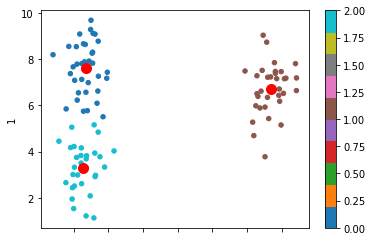

In [13]:
ax = df2.plot.scatter(x="x0", y="x1", c=df2["cluster"], cmap="tab10")
centroids = pd.DataFrame(km.cluster_centers_)
centroids.plot.scatter(x=0, y=1, c="red", s=100, ax=ax)

In [14]:
km.inertia_ # average squared distance from points to nearest centroid

192.05016214876525

Text(0, 0.5, 'avg squared dist to centroid')

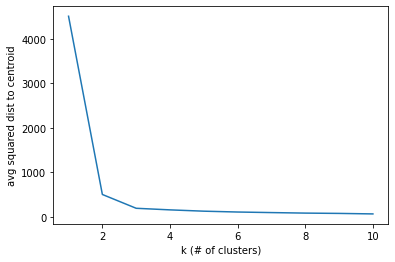

In [15]:
scores = pd.Series(dtype=float)

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(df)
    scores.loc[k] = km.inertia_
    
ax = scores.plot.line()
ax.set_xlabel("k (# of clusters)")
ax.set_ylabel("avg squared dist to centroid")